## Classification

In this notebook we'll take a look at classification tasks. Previously we were trying to predict new values based on prior knowledge about the relationship between input and output variables. Now the task is to predict a categorical variable, which can be yes/no, or membership probability in one of categories. We'll start with binary classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import cartesian
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Create data and plot

In [2]:
x = np.array([[3.25,6],[2.5,2],[2,1],[2,2],[2,3],[3,1],[3,4.5],[3,4],[4,1],[4,3],[3.5,3.5],[4,5],[3.5,4.5],[4,6]])
y = np.array([1,0,0,0,1,0,1,1,0,1,1,1,1,1])

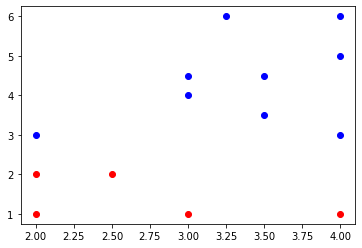

In [3]:
plt.plot(x[y == 0][:,0], x[y == 0][:,1], 'ro') # x[y == 0] picks from x rows in which values in y are == 0
plt.plot(x[y == 1][:,0], x[y == 1][:,1], 'bo')
plt.show()

In [4]:
#### Scale and plot

In [5]:
scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

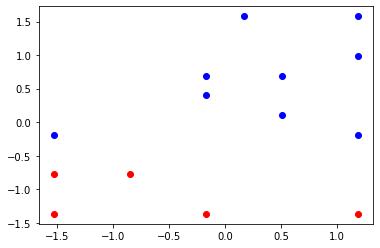

In [6]:
plt.plot(scaled_x[y == 0][:,0], scaled_x[y == 0][:,1], 'ro')
plt.plot(scaled_x[y == 1][:,0], scaled_x[y == 1][:,1], 'bo')
plt.show()

### Logistic regression

In logistic regression a linear decision boundary (line, or more generally, hyperplane) is fitted to the training data. The function has form 

$$\sigma(g(x)) = \frac{1}{1 + e^{-g(x)}}$$

where $g(x) = w_0 + w_1x_1 + w_2x_2$ (in two dimensions) and $\sigma$ is the sigmoid function. The effect of 
sigmoid is that it "squeezes" the 
$g(x)$ values into interval 0..1, which can be interpreted as probability. This means that $g(x)$ divides the plane into two regions, one where $g(x) \gt 0$ and the other where $g(x) \le 0$. In these $\sigma(g(x))$ will have values $\gt 0.5$ and $\le 0.5$, giving rise to decision function (rounding the value to 0 or 1).

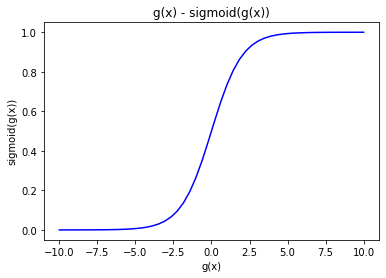

In [7]:
xs = np.linspace(-10,10)
sigm = 1 / (1 + np.exp(-xs))

plt.title("g(x) - sigmoid(g(x))")
plt.xlabel("g(x)")
plt.ylabel("sigmoid(g(x))")
plt.plot(xs, sigm, 'b')
plt.show()

#### Logistic regression

Create a logistic regression model and train it with the data. Note: here all the data is used - this is for demonstration purposes only.

In [8]:
lrmodel = LogisticRegression()
lrmodel.fit(scaled_x,y)

/Users/peter/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Plot the decision line

Logistic regression provides model parameters (the weights) in the same way as linear regression does, so we can create an equation for the decision line for plotting it.

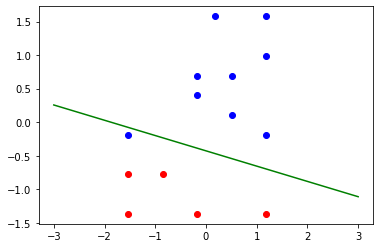

0.9285714285714286


In [9]:
b = lrmodel.intercept_
w = lrmodel.coef_[0]
k = -w[0]/w[1]

x1 = np.linspace(-3,3,10)
x2 =  -1 * x1*w[0]/w[1] - b/w[1]

plt.plot(scaled_x[y == 0][:,0], scaled_x[y == 0][:,1], 'ro')
plt.plot(scaled_x[y == 1][:,0], scaled_x[y == 1][:,1], 'bo')
plt.plot(x1, x2, 'g')
plt.show()
print(lrmodel.score(scaled_x,y))

### Support vector machine with linear decision boundary

Support vector machine algorithm is based on finding the samples that can be used for creating the decision boundary. In practice this algorithm tries to find the widest gap between the 0 and 1 samples.

In [10]:
svclinearmodel = LinearSVC()
svclinearmodel.fit(scaled_x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [11]:
decision_function = svclinearmodel.decision_function(scaled_x)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = scaled_x[support_vector_indices]

### SVM decision boundary and support vectors

In the diagram below the support vectors found by support vector machine algorithm are illustrated with thick dots. Note that also LinearSVC() model provides the weights after training, so they can be used for plotting the decision line.

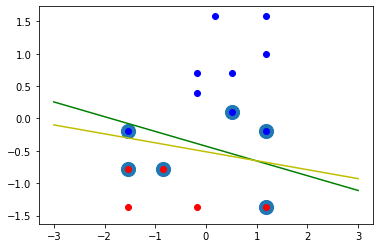

1.0


In [12]:
b = svclinearmodel.intercept_
w = svclinearmodel.coef_[0]

x1 = np.linspace(-3,3,10)
x22 =  -1 * x1*w[0]/w[1] - b/w[1]

plt.plot(scaled_x[y == 0][:,0], scaled_x[y == 0][:,1], 'ro')
plt.plot(scaled_x[y == 1][:,0], scaled_x[y == 1][:,1], 'bo')
plt.plot(x1, x2, 'g')
plt.plot(x1, x22, 'y')
plt.scatter(support_vectors[:,0], support_vectors[:,1], s=200)
plt.show()
print(svclinearmodel.score(scaled_x,y))

### SVM with radial kernel

Support vector machine is a special case of more general category of kernel methods. The idea of kernel methods is to map input features to a very high-dimensional (possibly infinite-dimensional) space and perform linear classification in that space. SVC class default kernel is rbf.

In [13]:
svcrbfmodel = SVC(gamma=1.0)
svcrbfmodel.fit(scaled_x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

To plot the decision boundary a grid is used. Grid is created by making a cartesian product of two ranges, and computing prediction for each of the values in the grid (svcrbfmodel.predict() call).

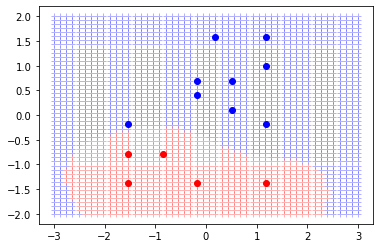

1.0


In [14]:
x1s = np.linspace(-3,3,50)
x2s = np.linspace(-2,2,50)
xs = cartesian((x1s,x2s))

cfs = svcrbfmodel.predict(xs)

plt.plot(scaled_x[y == 0][:,0], scaled_x[y == 0][:,1], 'ro')
plt.plot(scaled_x[y == 1][:,0], scaled_x[y == 1][:,1], 'bo')
plt.plot(xs[cfs==1][:,0],xs[cfs==1][:,1],'b+',alpha=0.3)
plt.plot(xs[cfs==0][:,0],xs[cfs==0][:,1],'r+',alpha=0.3)
plt.show()

print(svcrbfmodel.score(scaled_x,y))

#### Let's study the effect of SVC rbf kernel parameter gamma.

(15, 2) (15,)


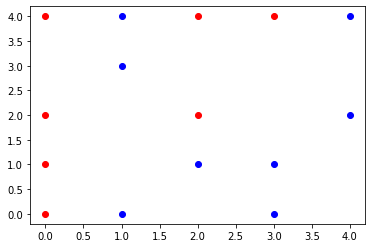

In [15]:
x = np.array([[0,0],[0,1],[0,2],[0,4],[1,0],[1,3],[1,4],[2,1],[2,2],[2,4],[3,0],[3,1],[3,4],[4,2],[4,4]])
y = np.array([0,0,0,0,1,1,1,1,0,0,1,1,0,1,1])
print(x.shape,y.shape)

plt.plot(x[y == 0][:,0], x[y == 0][:,1], 'ro')
plt.plot(x[y == 1][:,0], x[y == 1][:,1], 'bo')
plt.show()

In [16]:
scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

#### Effect of parameter gamma in creating classification boundaries

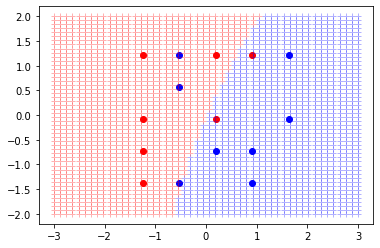

Gamma 0.1 score 0.6666666666666666


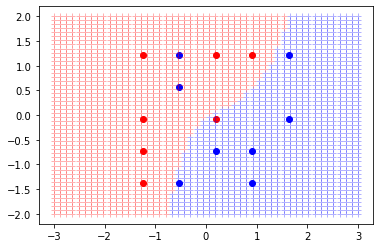

Gamma 0.5 score 0.8


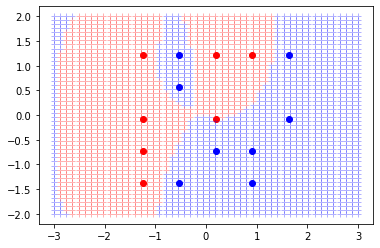

Gamma 1.0 score 0.9333333333333333


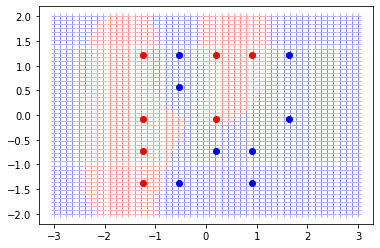

Gamma 1.5 score 1.0


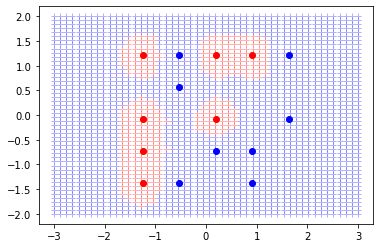

Gamma 10.0 score 1.0


In [17]:
def fitandplot(scaled_x,y,gamma):
    model = SVC(gamma=gamma)
    model.fit(scaled_x,y)
    
    x1s = np.linspace(-3,3,50)
    x2s = np.linspace(-2,2,50)
    xs = cartesian((x1s,x2s))

    cfs = model.predict(xs)

    plt.plot(scaled_x[y == 0][:,0], scaled_x[y == 0][:,1], 'ro')
    plt.plot(scaled_x[y == 1][:,0], scaled_x[y == 1][:,1], 'bo')
    plt.plot(xs[cfs==1][:,0],xs[cfs==1][:,1],'b+',alpha=0.3)
    plt.plot(xs[cfs==0][:,0],xs[cfs==0][:,1],'r+',alpha=0.3)
    plt.show()

    print("Gamma", gamma, "score", model.score(scaled_x,y))
    
for gamma in [0.1, 0.5, 1.0, 1.5, 10.0]:
    fitandplot(scaled_x,y,gamma)

## Multinomial classification

The classification methods we have taken a look at work with multinomial classification tasks, too. Strategies for multinomial classification include training multiple binary classifiers using either OvO (one-versus-one) or OvR (one-versus-rest) strategies, or the classifier may output a vector whose elements indicate the probability for each category.

### Read the data - Pandas

We use pandas library for reading in the data - it handles categorical (string) variables automatically. In our case the label has one of five possible string values but we don't need any further processing when using pandas.

With pandas data resides in a *dataframe* object. Data can be accessed as numpy array with .values. Pandas supports a rich functionality for analysing, visualising etc. data. We will not, however, take a closer look at that. See pandas documentation for tutorials.

In [18]:
df = pd.read_csv("basketball.csv")
data = df.values
x = data[:,:5]
y = data[:,5]

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Let's train the model and then print confusion matrix for both training and test sets. Confusion matrix contains counts of predictions (values $C_{i,j}$) organised as rows and columns - rows (the first index of $C_{i,j}$) represent the known true values, columns (second index of $C_{i,j}$) give the number of samples predicted to belong to the category given by the column. So, if everything is perfect, confusion matrix is diagonal, ie. has only $C_{i,i}$ values.

In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)

print("training accuracy", model.score(x_train, y_train))
print(confusion_matrix(model.predict(x_train), y_train))

print("validation accuracy", model.score(x_test, y_test))
print(confusion_matrix(model.predict(x_test), y_test))

training accuracy 0.75
[[7 0 2 0 1]
 [0 3 0 0 0]
 [0 0 3 0 2]
 [0 0 0 4 0]
 [0 0 0 1 1]]
validation accuracy 0.7272727272727273
[[4 0 0 0]
 [0 2 0 3]
 [0 0 2 0]
 [0 0 0 0]]


/Users/peter/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peter/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
from sklearn.svm import SVC

model = SVC(gamma=0.3)
model.fit(x_train, y_train)

print("training accuracy", model.score(x_train, y_train))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(model.predict(x_train), y_train))

print("validation accuracy", model.score(x_test, y_test))
print(confusion_matrix(model.predict(x_test), y_test))

training accuracy 1.0
[[7 0 0 0 0]
 [0 3 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 4]]
validation accuracy 0.36363636363636365
[[0 4 1 2 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 3]]


#### Decision tree classifier

In addition to the standard metrics, we can also try to understand the decision tree by taking a look at its graphical representation.

training accuracy 1.0
[[7 0 0 0 0]
 [0 3 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 4]]
validation accuracy 0.7272727272727273
[[2 0 0 0]
 [0 2 0 0]
 [1 0 1 0]
 [1 0 1 3]]


[Text(133.92000000000002, 195.696, 'X[1] <= 102.0\ngini = 0.8\nsamples = 35\nvalue = [7, 7, 7, 7, 7]'),
 Text(66.96000000000001, 152.208, 'X[2] <= 32.5\ngini = 0.5\nsamples = 14\nvalue = [0, 7, 0, 7, 0]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 7, 0]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 114.5\ngini = 0.667\nsamples = 21\nvalue = [7, 0, 7, 0, 7]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 7]'),
 Text(234.36, 108.72, 'X[0] <= 214.5\ngini = 0.5\nsamples = 14\nvalue = [7, 0, 7, 0, 0]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0, 0]'),
 Text(267.84000000000003, 65.232, 'X[2] <= 16.5\ngini = 0.219\nsamples = 8\nvalue = [7, 0, 1, 0, 0]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(301.32000000000005, 21.744, 'gini = 0.0\nsamples = 7\nvalue = [7,

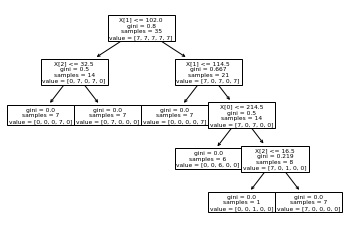

In [21]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

print("training accuracy", model.score(x_train, y_train))
print(confusion_matrix(model.predict(x_train), y_train))

print("validation accuracy", model.score(x_test, y_test))
print(confusion_matrix(model.predict(x_test), y_test))

tree.plot_tree(model.fit(x, y)) 

#### Random forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

print("training accuracy", model.score(x_train, y_train))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(model.predict(x_train), y_train))

print("validation accuracy", model.score(x_test, y_test))
print(confusion_matrix(model.predict(x_test), y_test))

training accuracy 1.0
[[7 0 0 0 0]
 [0 3 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 4]]
validation accuracy 0.6363636363636364
[[0 0 1 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 1 0 2 2]
 [0 0 0 0 1]]


/Users/peter/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Image data

Example of how to read in image data (MNIST data set of images of digits).

In [23]:
from sklearn.datasets import fetch_openml

x, y = fetch_openml('mnist_784', version=1, return_X_y=True) # this needs to be run only once

Let's take a look at our data. We have 70000 samples! Each sample is a vector of length 784, and label a single digit (which is converted from string to int below).

To plot an image, we'll need to reshape it into an array with shape (28,28), note that $28 * 28 = 784$. For training a model, the shape remains 784.

(70000, 784) (70000,)


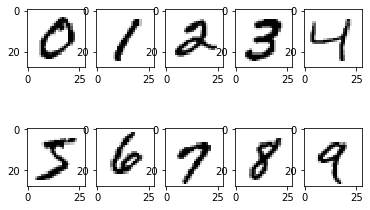

In [24]:
y = y.astype(int)

print(x.shape, y.shape)

fig, ax = plt.subplots(2,5)
ax = ax.flatten()

for i in range(10):
    im_idx = np.argwhere(y == i)
    plottable_image = np.reshape(x[im_idx][0], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')